## Regression

- Linear Regression
- Nearest Neighbor Regression

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

colors = plt.rcParams['axes.color_cycle']

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.datasets.samples_generator import make_regression

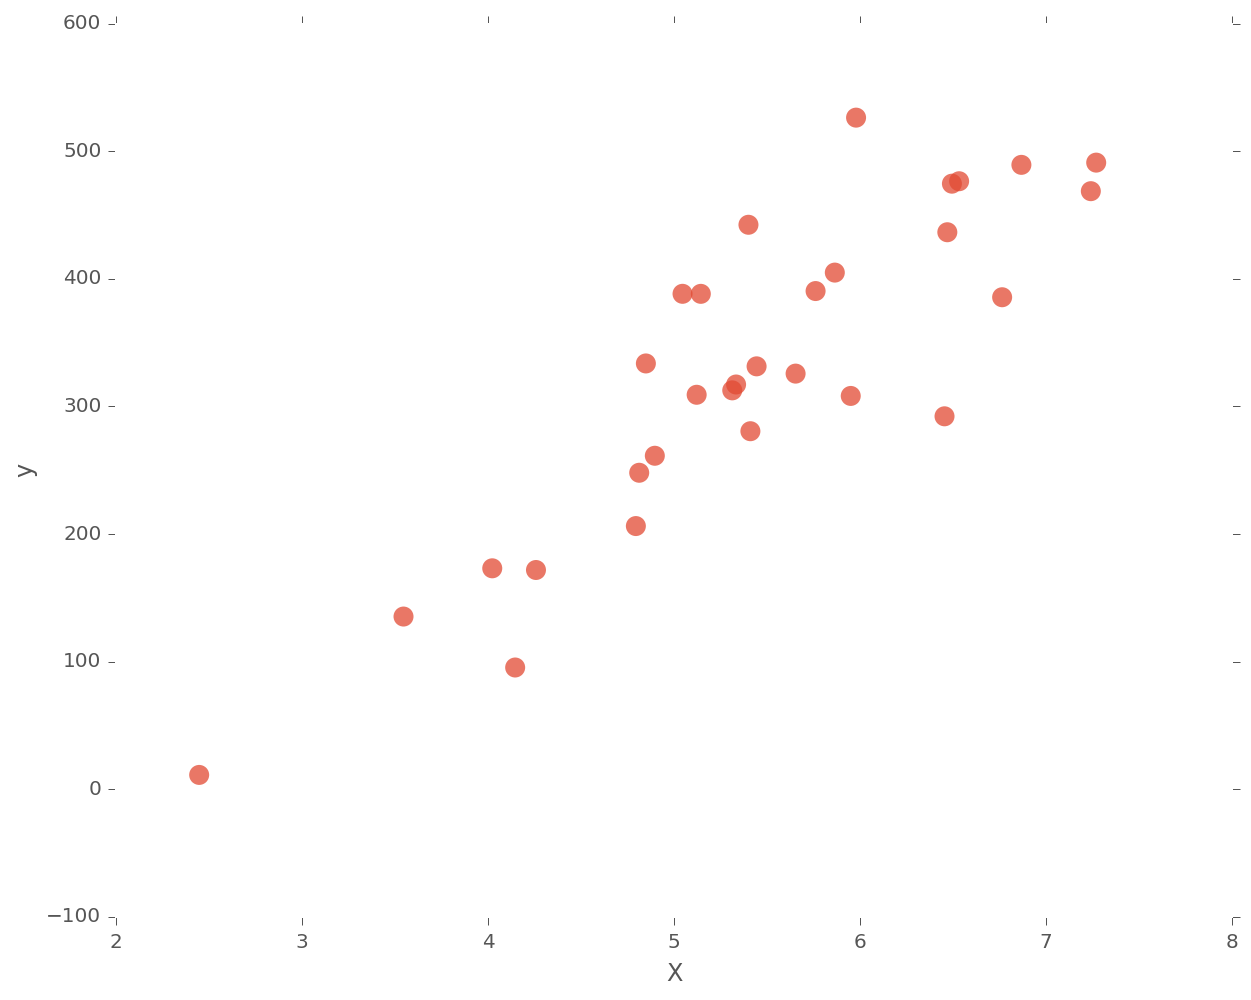

In [12]:
X, y = make_regression( n_samples=30, n_features=1, n_informative=1, random_state=0, noise=75) 
X = X + 5
y = y + 300

def plot():
    fig, ax = plt.subplots()
    ax.scatter(X[:,0], y, edgecolor='none', s=100, alpha=0.75, c=colors[0])
    ax.set_xlabel('X')
    ax.set_ylabel('y')
    fig.show()
    
plot()

### Linear Regression

In [13]:
regr = LinearRegression()
regr.fit(X, y)

print regr.intercept_, regr.coef_
print regr.score(X,y)

-220.348130992 [ 100.96917215]
0.759670081702


In [14]:
X_new = np.linspace(2,8,10)[:,np.newaxis] # to make it (n,m)
y_pred = regr.predict(X_new)

In [15]:
def plot():
    fig, ax = plt.subplots()

    ax.plot(X_new[:,0], y_pred, color='darkgrey', linewidth=2)
    ax.scatter(X[:,0], y, edgecolor='none', s=100, alpha=0.75, c=colors[0])

    ax.set_xlabel('X')
    ax.set_ylabel('y')

    fig.show()

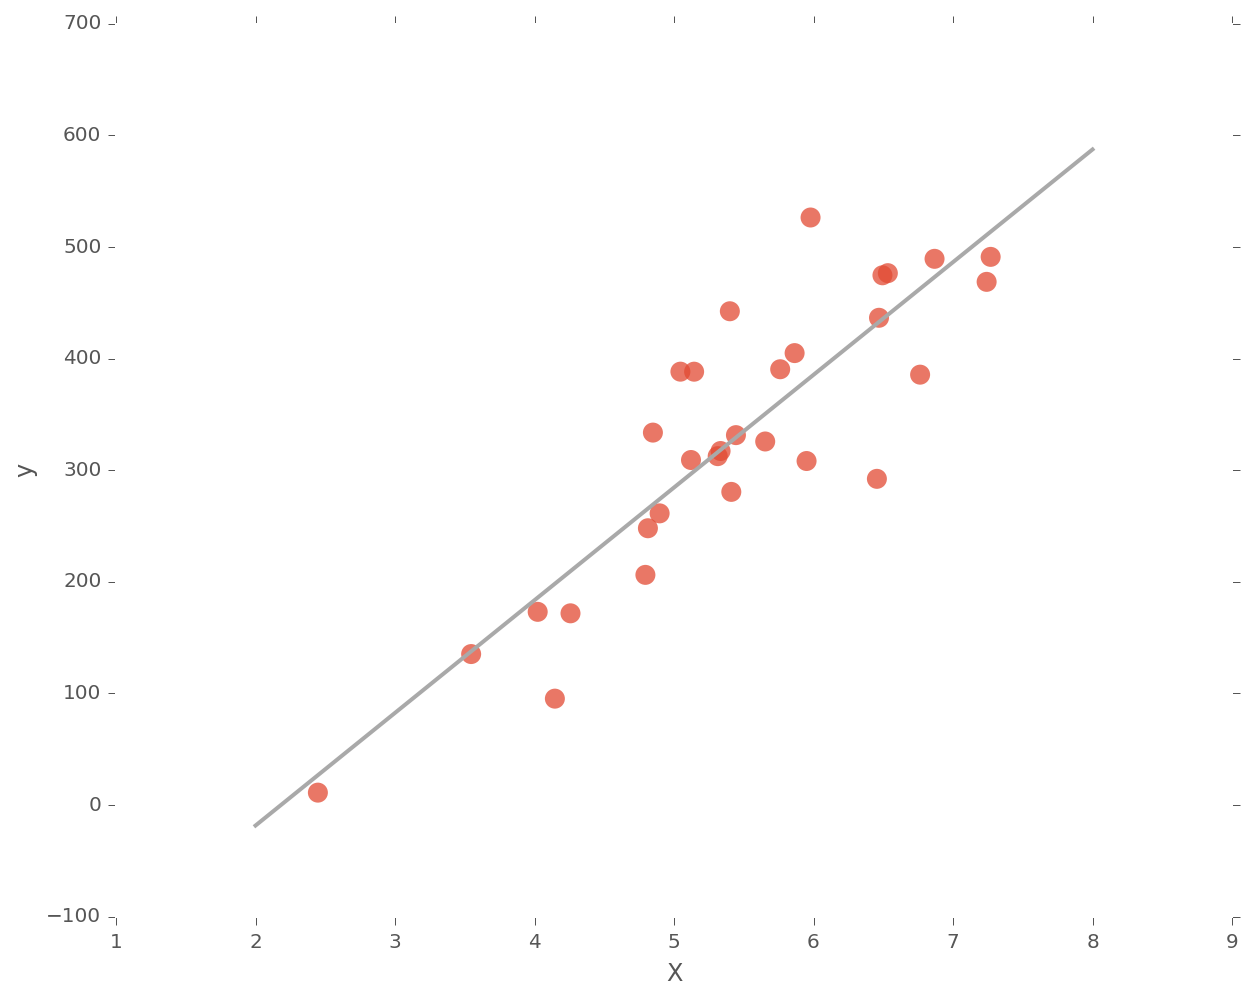

In [16]:
plot()

### Nearst Neighbors

In [17]:
regr_nn = KNeighborsRegressor()
regr_nn.fit(X, y)

print regr_nn.score(X,y)

0.781550018011


In [18]:
def plot():
    fig, ax = plt.subplots()

    ax.scatter(X[:,0], y, edgecolor='none', s=100, alpha=0.75, c=colors[0])
    ax.plot(X_new[:,0], regr_nn.predict(X_new), color='darkgrey', linewidth=2)

    ax.set_xlabel('X')
    ax.set_ylabel('y')
    fig.show()

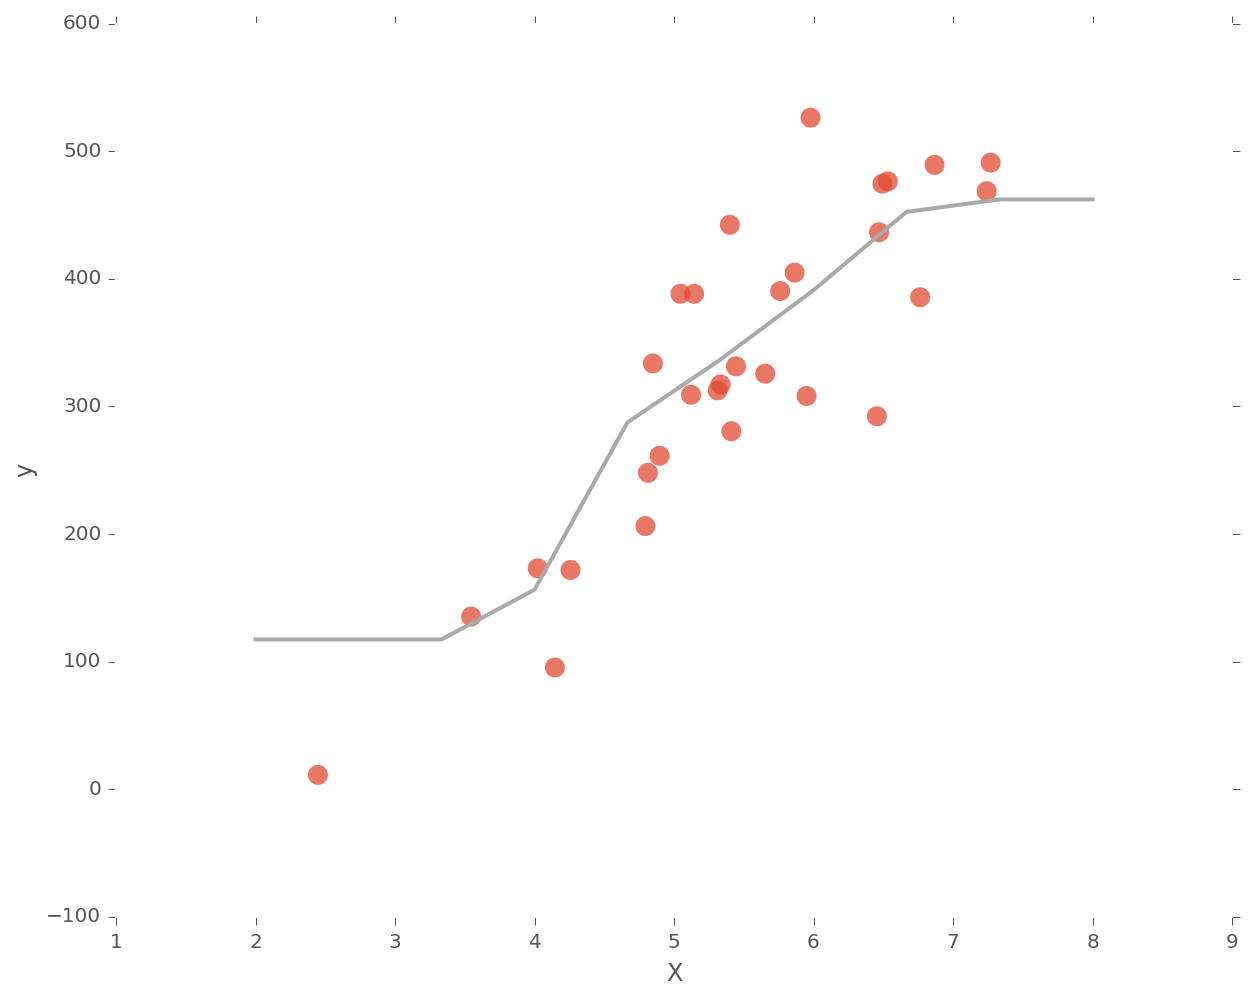

In [19]:
plot()

### How do they Work?

In [20]:
X, y = make_regression( n_samples=15, n_features=1, n_informative=1,
                        random_state=1, noise=35) 
X = X + 5
y = y + 250

In [21]:
regr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
def plot():
    fig, ax = plt.subplots()

    ax.vlines(X[:,0], regr.predict(X), y, color='grey')
    ax.scatter(X[:,0], y, edgecolor='none', s=100, alpha=1., c=colors[0])
    ax.plot(X_new[:,0], regr.predict(X_new) , color='darkgrey', linewidth=2)

    ax.set_xlabel('X')
    ax.set_ylabel('y')
    fig.show()

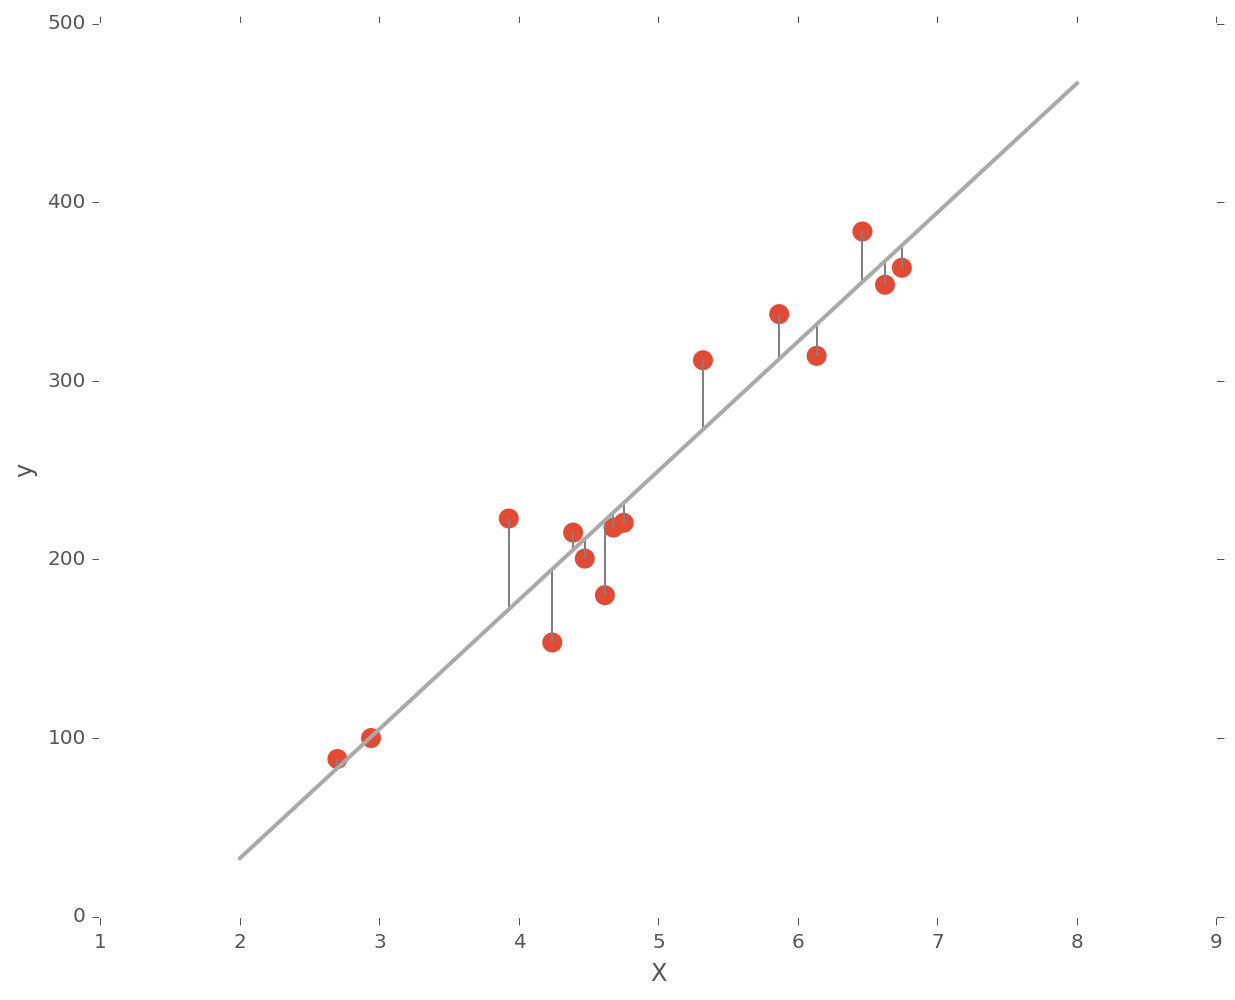

In [23]:
plot()

In [24]:
from sklearn import metrics

h = 50
xx, yy = np.meshgrid(np.linspace(0, regr.intercept_*2.0, h),
                     np.linspace(0, regr.coef_[0]*2.0, h))

Z = np.c_[xx.ravel(), yy.ravel()]
res = map(lambda z: metrics.mean_squared_error(y, z[0] + z[1]*X), Z)
res2 = np.array(res).reshape(xx.shape)

points = np.c_[ Z[np.argsort(res)[650]], np.array([regr.intercept_, regr.coef_[0]])].T

In [27]:
def contour(ax):
    ax.contour(xx, yy, res2, 50, alpha=0.20, cmap=plt.cm.Greys_r)
    ax.contourf(xx, yy, res2, 50, alpha=0.20, cmap=plt.cm.Greys)
    ax.scatter(regr.intercept_, regr.coef_[0] , s=70, 
               alpha=0.75, edgecolor='none', c=colors[0])
    ax.scatter(points[0][0], points[0][1], c=colors[1], s=70)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())

    ax.set_ylabel('coef_')
    ax.set_xlabel('intercept_')

def line(ax):
    ax.vlines(X[:,0], regr.predict(X), y, color='grey')
    ax.plot(X_new[:,0], points[0][0] + points[0][1]*X_new[:,0], color=colors[1])
    ax.plot(X_new[:,0], points[1][0] + points[1][1]*X_new[:,0], color=colors[0])
    ax.scatter(X[:,0], y, edgecolor='none', s=70, alpha=1., c=colors[0])

    ax.set_xlabel('X')
    ax.set_ylabel('y')

def plot():    
    fig, ax = plt.subplots(1,2, figsize=(12,6))
    contour(ax[0])
    line(ax[1])
    fig.show()

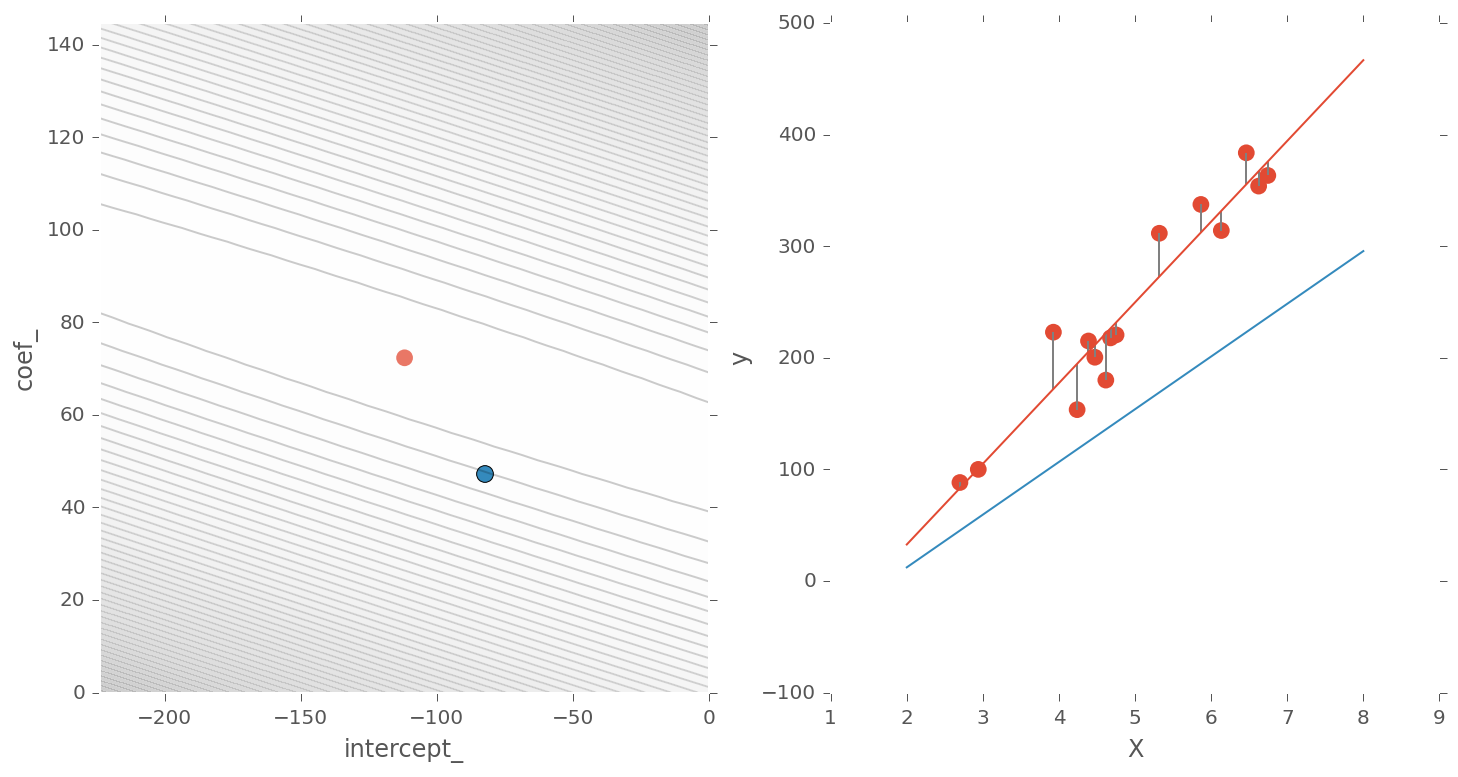

In [28]:
plot()

In [29]:
regr_nn.fit(X,y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_neighbors=5, p=2, weights='uniform')

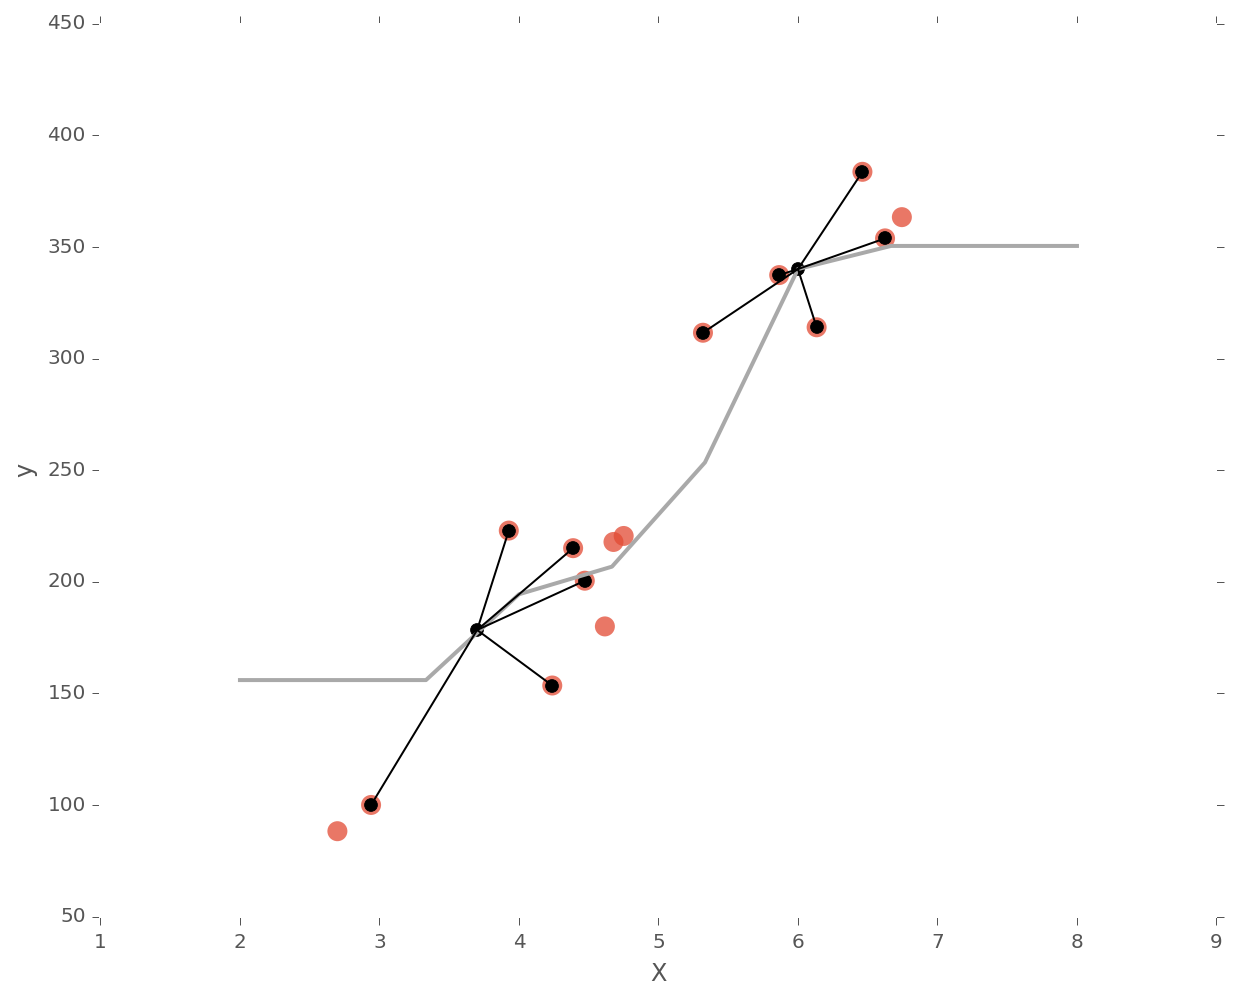

In [30]:
fig, ax = plt.subplots()

ax.scatter(X[:,0], y, edgecolor='none', s=100, alpha=0.75, c=colors[0])
ax.plot(X_new[:,0], regr_nn.predict(X_new), color='darkgrey', linewidth=2)

pt = 3.7
neighbors = np.argsort(np.sqrt(np.square(X[:,0] - pt)))[:5]
for i in range(5):
    ax.plot( [ pt, X[neighbors[i]][0]] , [np.mean(y[neighbors]), y[neighbors[i]]], color='black' )
ax.scatter(X[neighbors], y[neighbors], c='black', s=40)
ax.scatter(pt, np.mean(y[neighbors]), c='black', s=40)

pt = 6
neighbors = np.argsort(np.sqrt(np.square(X[:,0] - pt)))[:5]
for i in range(5):
    ax.plot( [ pt, X[neighbors[i]][0]] , [np.mean(y[neighbors]), y[neighbors[i]]], color='black' )
ax.scatter(X[neighbors], y[neighbors], c='black', s=40)
ax.scatter(pt, np.mean(y[neighbors]), c='black', s=40)

ax.set_xlabel('X')
ax.set_ylabel('y')
fig.show()

## Classification

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.datasets.samples_generator import make_classification
from sklearn.datasets import make_circles

In [32]:
def plotXY():
    fig, ax = plt.subplots()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=70, alpha=0.75, edgecolor='none')
    ax.set_xlabel('X[:,0]')
    ax.set_ylabel('X[:,1]')
    fig.show()

In [33]:
def plot(clf):
    h = 50
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, h),
                         np.linspace(y_min, y_max, h))

    clf.fit(X, y)
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)

    fig, ax = plt.subplots()
    ax.contourf(xx, yy, Z, alpha=0.15, levels=[0,0.5,1], cmap=plt.cm.Greys)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=70, alpha=0.75, edgecolor='none')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('X[:,0]')
    ax.set_ylabel('X[:,1]')
    fig.show()

### Madelon dataset

In [38]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=6, n_clusters_per_class=1)

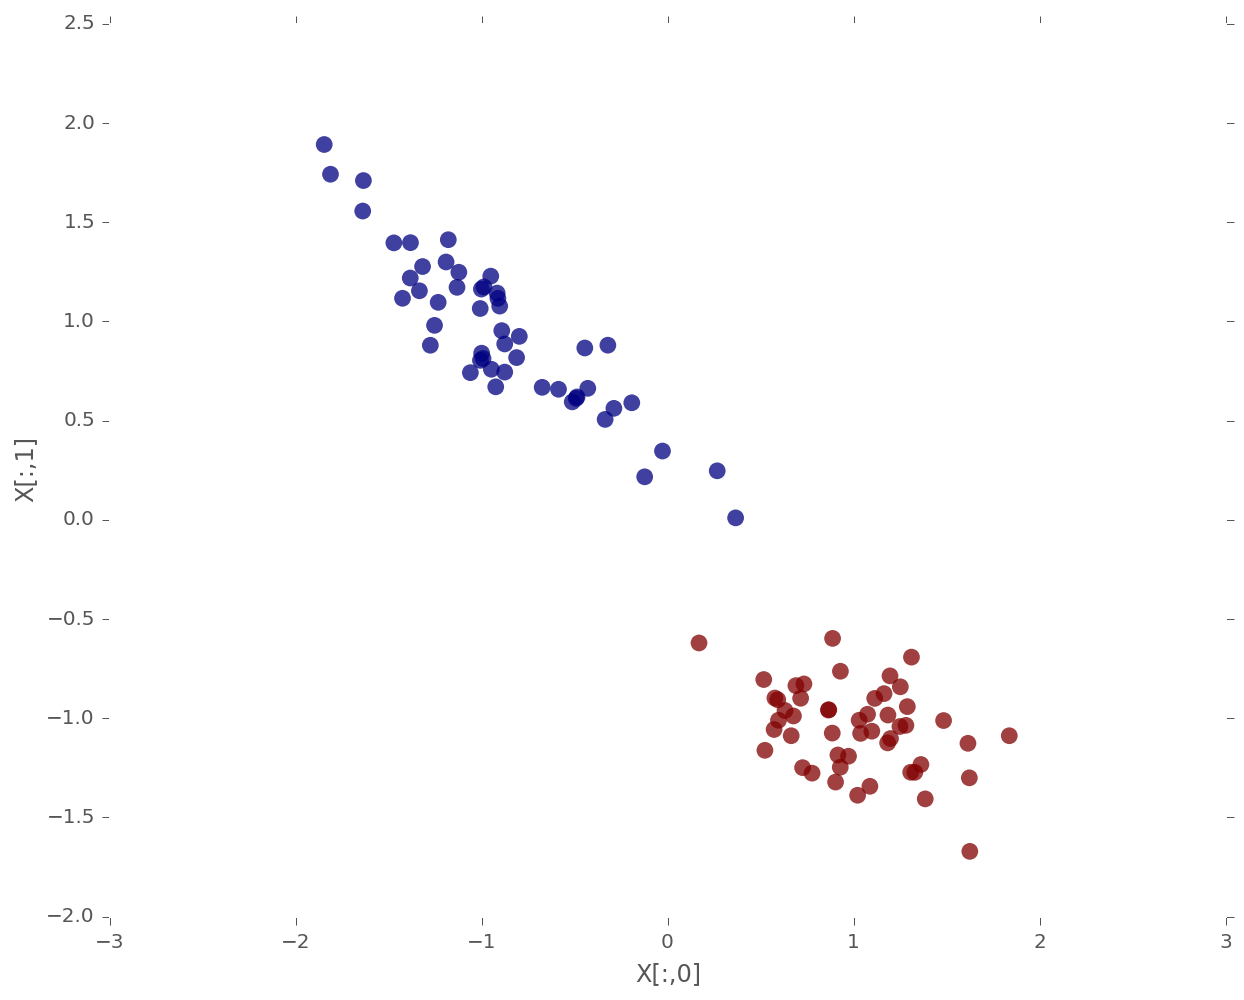

In [39]:
plotXY()

In [40]:
clf = KNeighborsClassifier()
clf.fit(X, y)
print clf.score(X,y)

1.0


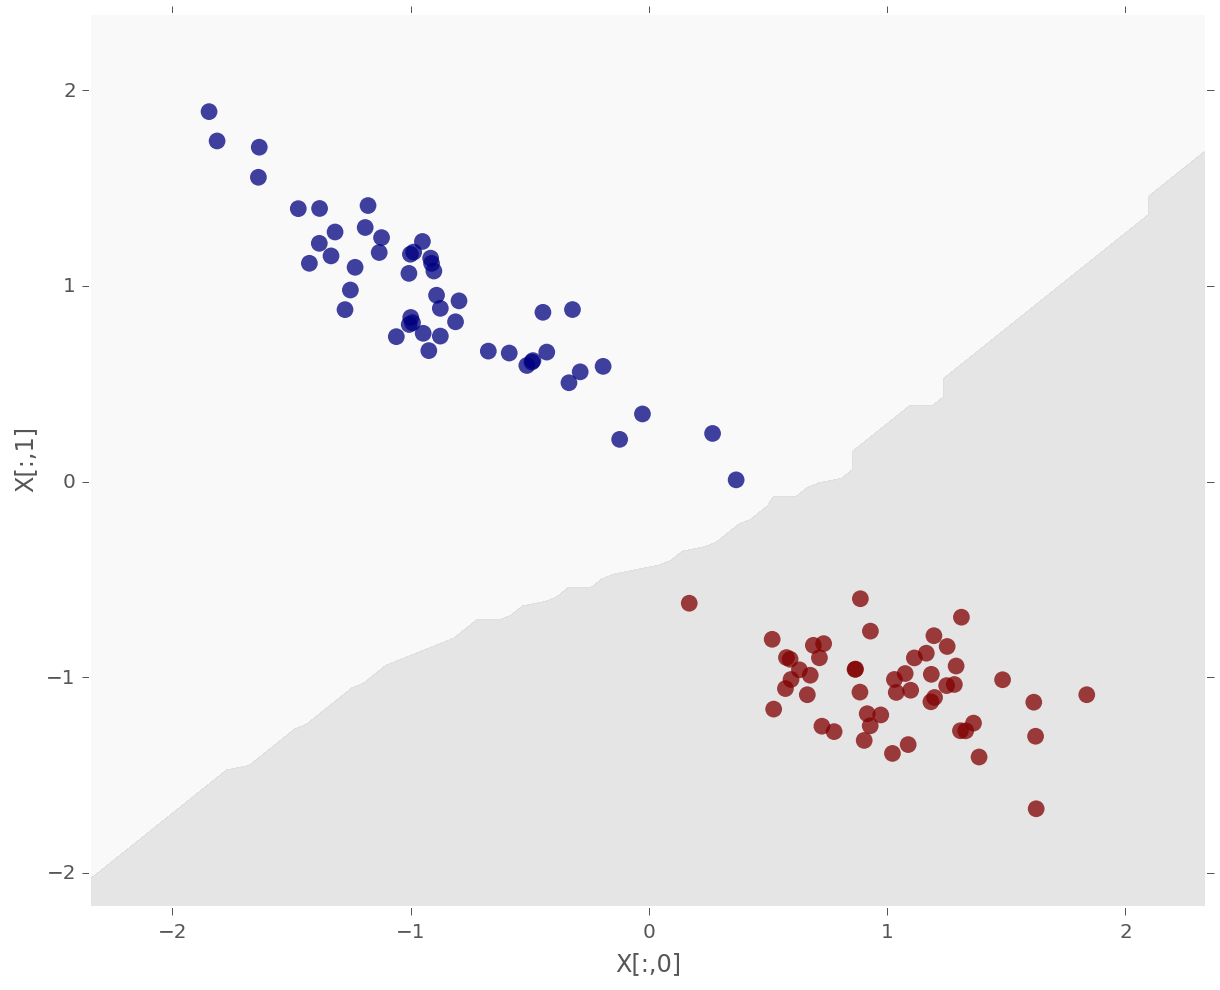

In [41]:
plot(clf)

In [42]:
clf = LogisticRegression()
clf.fit(X, y)
print clf.score(X,y)

0.99


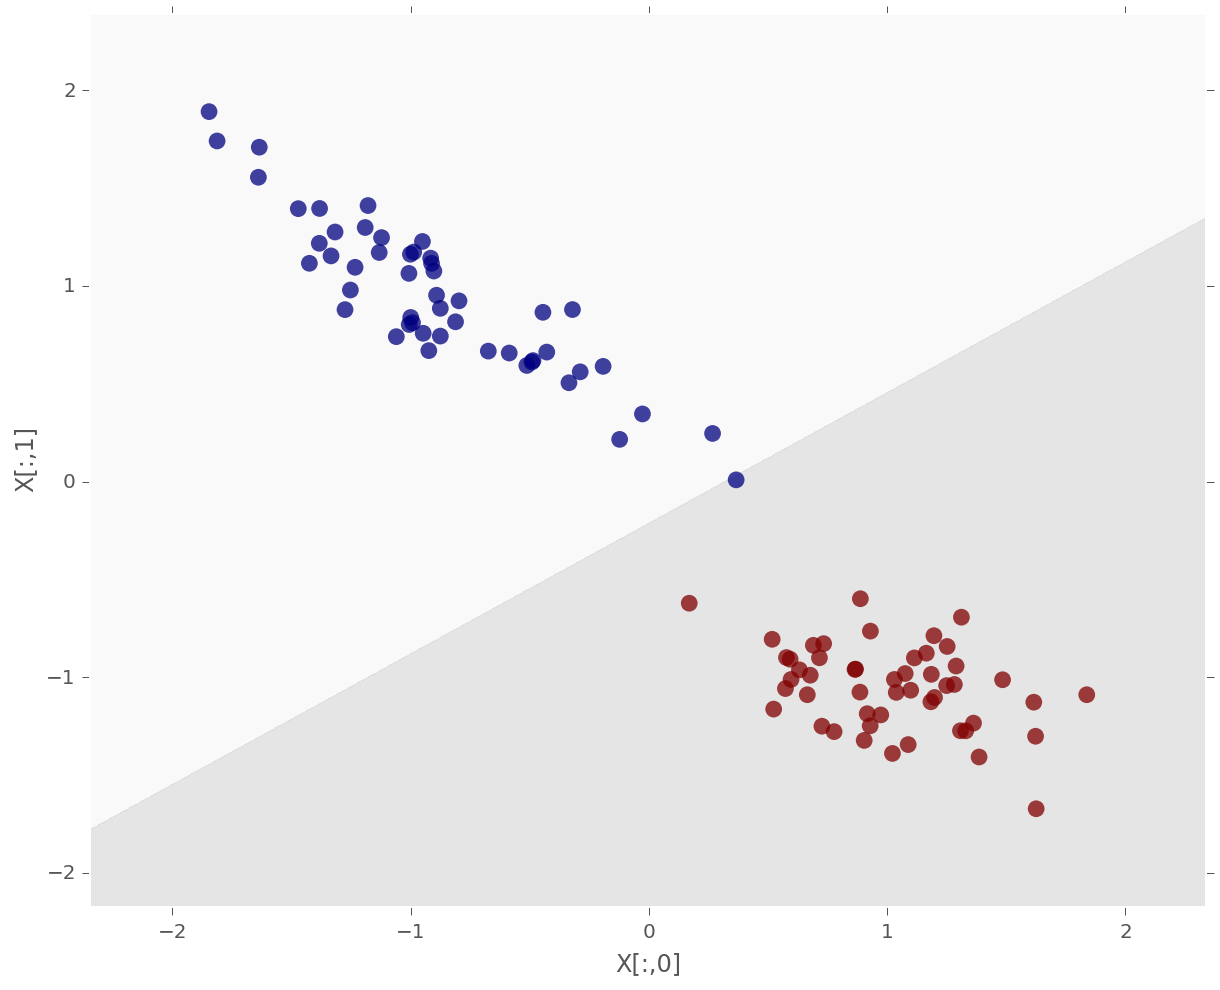

In [43]:
plot(clf)

### Circles

In [44]:
X, y = make_circles(noise=0.2, factor=0.5, random_state=1)

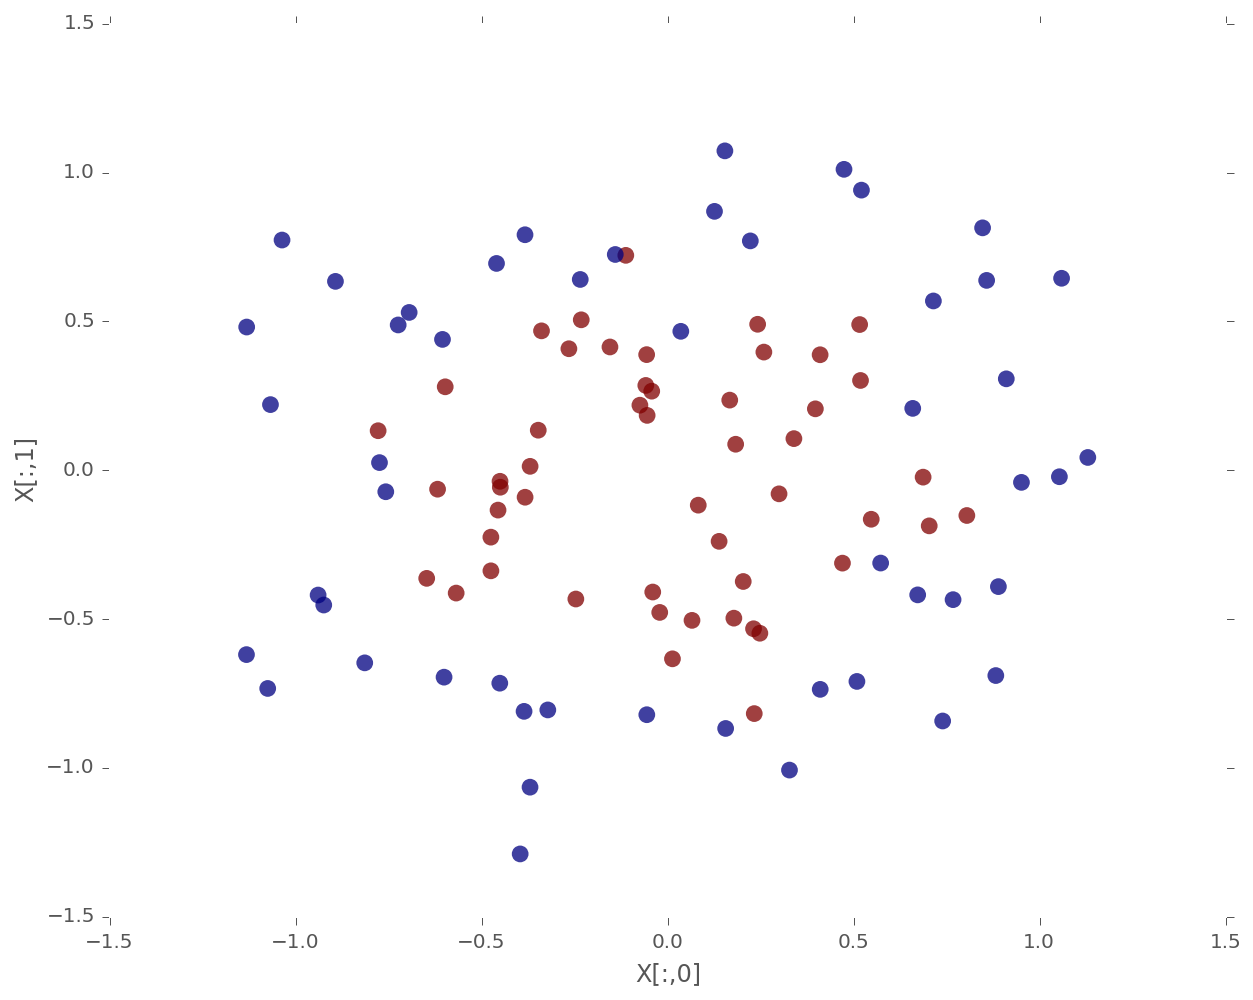

In [45]:
plotXY()

In [46]:
clf = KNeighborsClassifier()
clf.fit(X, y)
print clf.score(X,y)

0.9


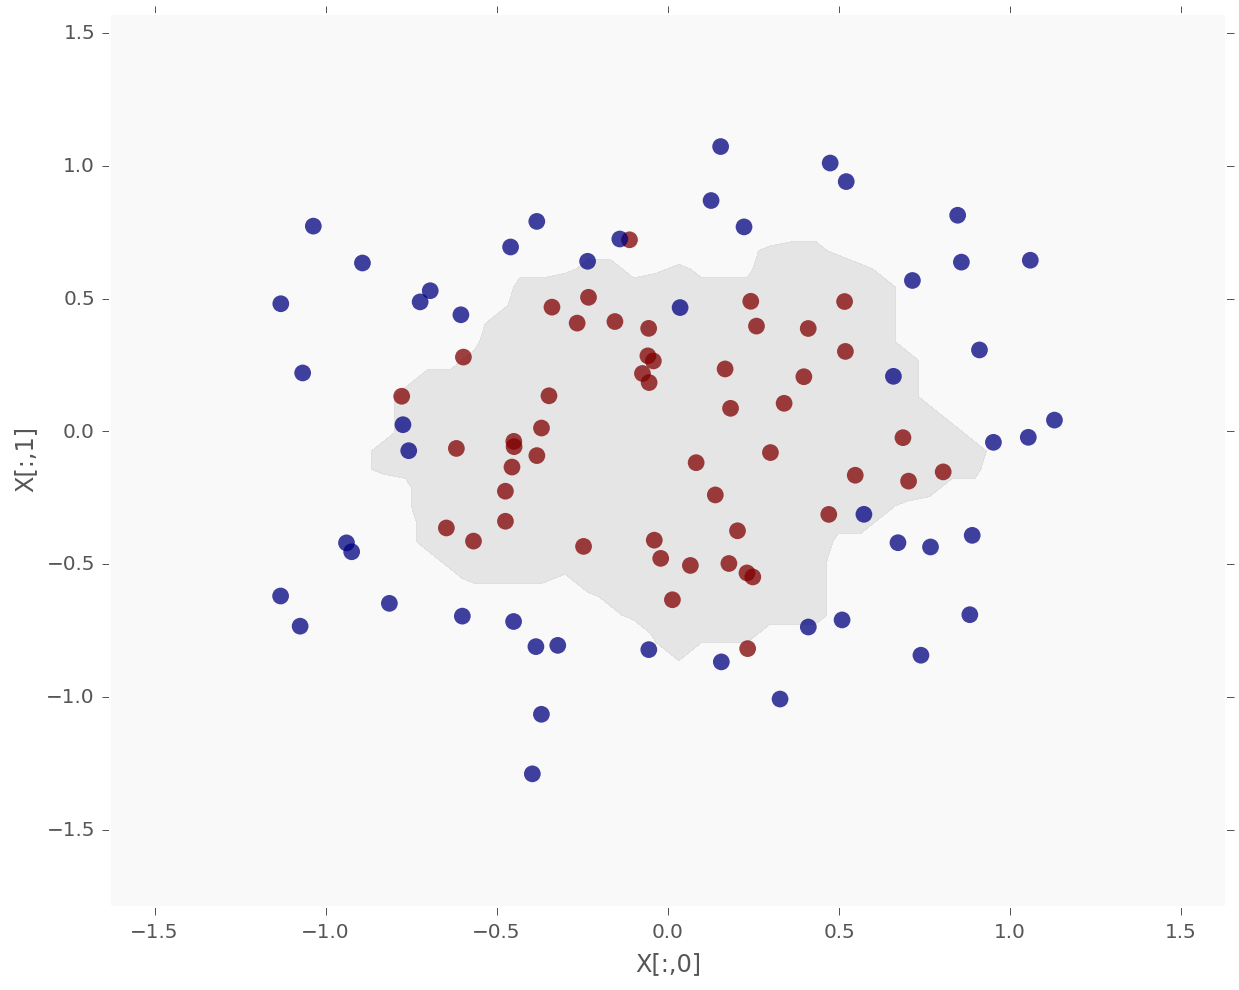

In [47]:
plot(clf)

In [48]:
clf = LogisticRegression()
clf.fit(X, y)
print clf.score(X,y)

0.48


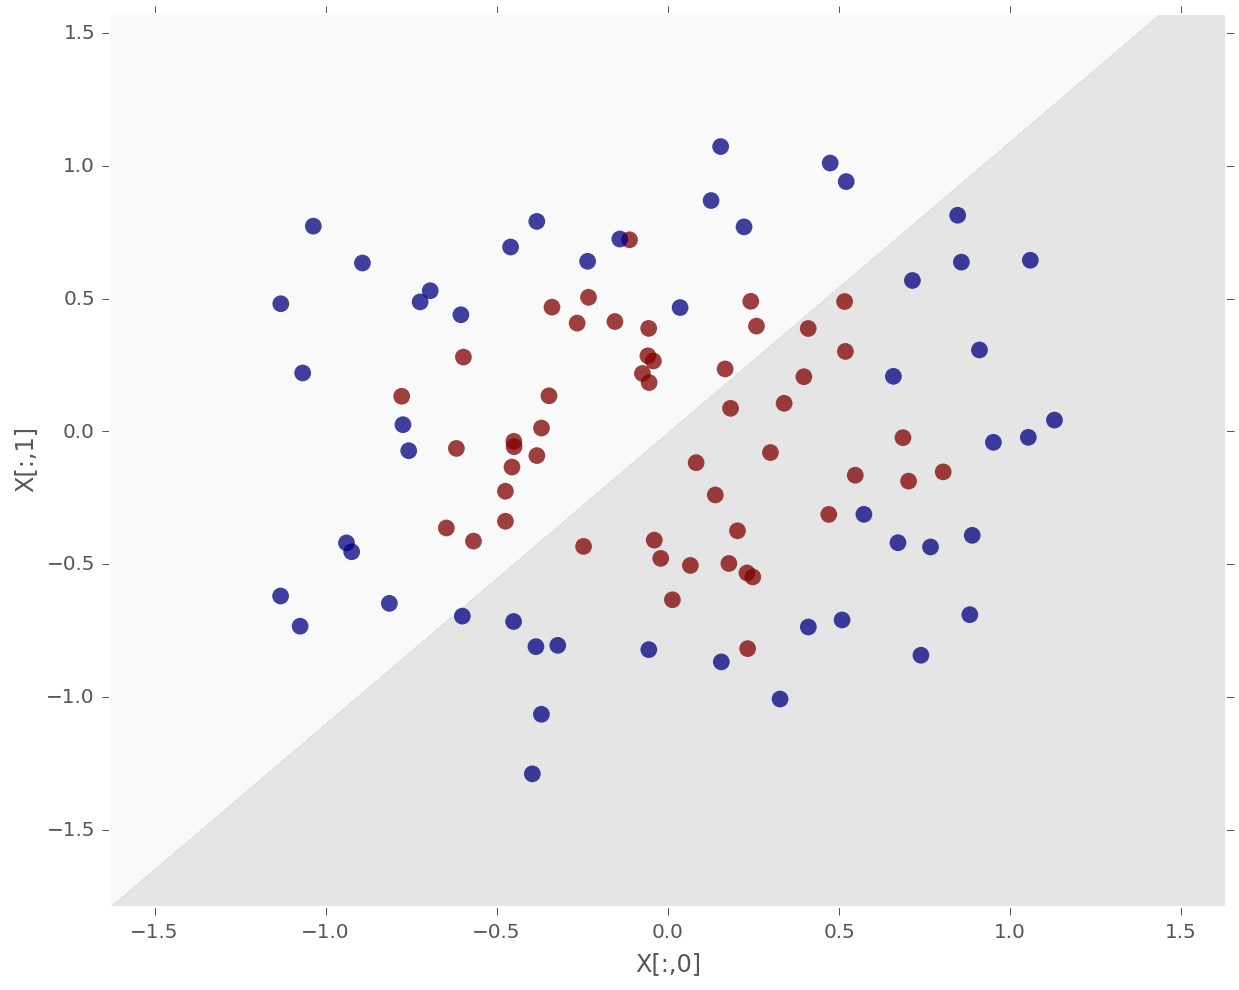

In [49]:
plot(clf)